In [71]:
import numpy as np #fungsi matematika
import pandas as pd #membaca file csv
import seaborn as sns #memvisualisasikan data juga pake grafik
import matplotlib.pyplot as plt #buat grafik plot atau titik titik kedekatan data

#library algoritma machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [72]:
data = pd.read_csv('https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/kc_house_3_features.csv')
data

,sqft_living,sqft_living15,sqft_above,price
0,1180,1340,1180,221900.0
1,2570,1690,2170,538000.0
2,770,2720,770,180000.0
3,1960,1360,1050,604000.0
4,1680,1800,1680,510000.0
...,...,...,...,...
95,3300,1950,2390,905000.0
96,1960,1750,1960,247500.0
97,1160,1160,1160,199000.0
98,1810,1650,1210,314000.0


<h1>1. Analisis Korelasi</h1>

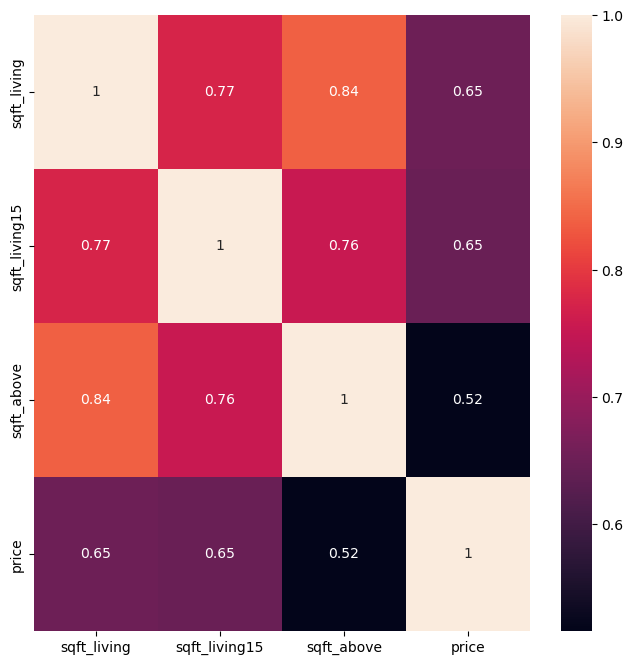

In [73]:
data.corr()

#visualisasi menggunakan heatmap
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

<h2>Split Dataset</h2>
pecah menjadi data training (x_train, y_train) 80%
pecah menjadi data testing (x_testing, y_testing) 20%

In [74]:
x = data.iloc[: , :-1]
y = data.iloc[: , -1]

x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [75]:
print('ukuran training dan testing data')
print('training dataset :', x_train.shape, y_train.shape)
print('training testing :', x_test.shape, y_test.shape)

ukuran training dan testing data
training dataset : (80, 3) (80,)
training testing : (20, 3) (20,)


# 2. Modeling
kita akan melatih lebih dari satu model regresi, antara lain:
    1. regresi linier
    2. regresi lasso
    3. regresi ridge
    4. support vector regressor
    5. decision tree regressor
latih semua modedl menggunakan training data(x_train, y_train)
    

In [76]:
#menggunakanr regresi linier
linearReg = LinearRegression().fit(x_train,y_train)

#menggunakan model lasso
lassoReg = Lasso(alpha=0.1).fit(x_train,y_train)

#menggunakan model lasso
ridgeReg = Ridge(alpha=0.1).fit(x_train,y_train)

#menggunakan model lasso
svrReg = SVR().fit(x_train,y_train)

#menggunakan model lasso
dtReg = DecisionTreeRegressor(random_state=47).fit(x_train,y_train)

alpha dan random state merupakan hyperparameter. umumnya, setiap algoritma ai memiliki hyperparameter yang bisa kita setel sesuai keinginan. setelah hyperparameter yang tepat mampu meningkatkan perorma model.

# 3. Evaluasi model menggunakan metric mse dan r2

In [77]:
#hasil prediksi model regresi linier
yPredTrain_reglin = linearReg.predict(x_train)
yPredTest_reglin = linearReg.predict(x_test)

#hasil prediksi model regresi linier
yPredTrain_lasso = lassoReg.predict(x_train)
yPredTest_lasso = lassoReg.predict(x_test)

#hasil prediksi model regresi linier
yPredTrain_ridge = ridgeReg.predict(x_train)
yPredTest_ridge = ridgeReg.predict(x_test)

#hasil prediksi model regresi linier
yPredTrain_svr = svrReg.predict(x_train)
yPredTest_svr = svrReg.predict(x_test)

#hasil prediksi model regresi linier
yPredTrain_dtr = dtReg.predict(x_train)
yPredTest_dtr = dtReg.predict(x_test)

evaluasi pertama menggunakan metrics mse
bandingkan:
    label training data (y_train) dengan hasil prediksi training data (y pred train) 
    label testing data (y_test) dengan hasil prediksi test data (y pred test) 

In [78]:
#mse model regresi linier
print('Nilai MSE data training regresi linier =', mean_squared_error(y_train, yPredTrain_reglin))
print('Nilai MSE data testing regresi linier =', mean_squared_error(y_test, yPredTest_reglin), '\n')

#mse model regresi lasso
print('Nilai MSE data training regresi lasso =', mean_squared_error(y_train, yPredTrain_lasso))
print('Nilai MSE data testing regresi lasso =', mean_squared_error(y_test, yPredTest_lasso), '\n')

#mse model regresi ridge
print('Nilai MSE data training regresi ridge =', mean_squared_error(y_train, yPredTrain_ridge))
print('Nilai MSE data testing regresi ridge =', mean_squared_error(y_test, yPredTest_ridge), '\n')

#mse model regresi SVR
print('Nilai MSE data training regresi SVR =', mean_squared_error(y_train, yPredTrain_svr))
print('Nilai MSE data testing regresi SVR =', mean_squared_error(y_test, yPredTest_svr), '\n')

#mse model DTR
print('Nilai MSE data training regresi DTR=', mean_squared_error(y_train, yPredTrain_dtr))
print('Nilai MSE data testing regresi DTR =', mean_squared_error(y_test, yPredTest_dtr), '\n')


Nilai MSE data training regresi linier = 51040616225.0368
Nilai MSE data testing regresi linier = 32881775262.158394 

Nilai MSE data training regresi lasso = 51040616225.0368
Nilai MSE data testing regresi lasso = 32881775271.07428 

Nilai MSE data training regresi ridge = 51040616225.03679
Nilai MSE data testing regresi ridge = 32881775254.902416 

Nilai MSE data training regresi SVR = 113673471256.08711
Nilai MSE data testing regresi SVR = 37393496977.231895 

Nilai MSE data training regresi DTR= 455625000.0
Nilai MSE data testing regresi DTR = 40958648000.0 



In [79]:
#r2 Score
print(f'R^2 score Regresi Linier : {linearReg.score(x,y)}')
print(f'R^2 score Regresi Lasso : {lassoReg.score(x,y)}')
print(f'R^2 score Regresi Ridge : {ridgeReg.score(x,y)}')
print(f'R^2 score Regresi Linier : {svrReg.score(x,y)}')
print(f'R^2 score Regresi Linier : {dtReg.score(x,y)}')

R^2 score Regresi Linier : 0.48353037146199596
R^2 score Regresi Lasso : 0.48353037144257016
R^2 score Regresi Ridge : 0.4835303714778054
R^2 score Regresi Linier : -0.07215508470730314
R^2 score Regresi Linier : 0.906788861012355


<h2>Visualisasi Hasil Prediksi Dengan Sebenarnya</h2>

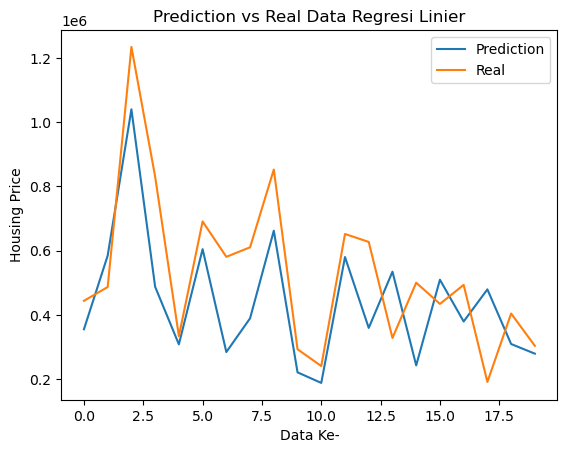

In [80]:
plt.plot(y_test.values)
plt.plot(yPredTest_reglin)
plt.title('Prediction vs Real Data Regresi Linier')
plt.xlabel("Data Ke-")
plt.ylabel("Housing Price")
plt.legend(labels=['Prediction','Real'])
plt.show()

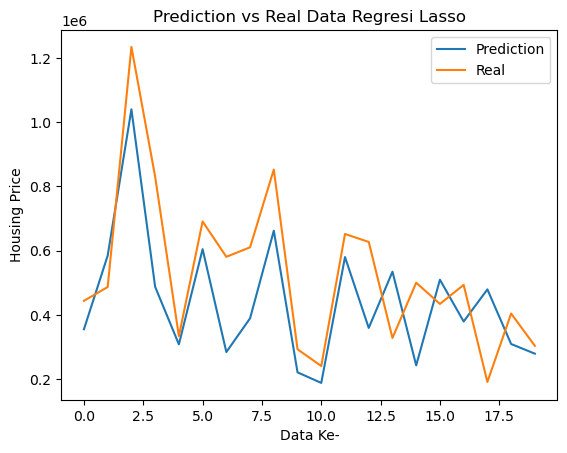

In [81]:
plt.plot(y_test.values)
plt.plot(yPredTest_lasso)
plt.title('Prediction vs Real Data Regresi Lasso')
plt.xlabel("Data Ke-")
plt.ylabel("Housing Price")
plt.legend(labels=['Prediction','Real'])
plt.show()

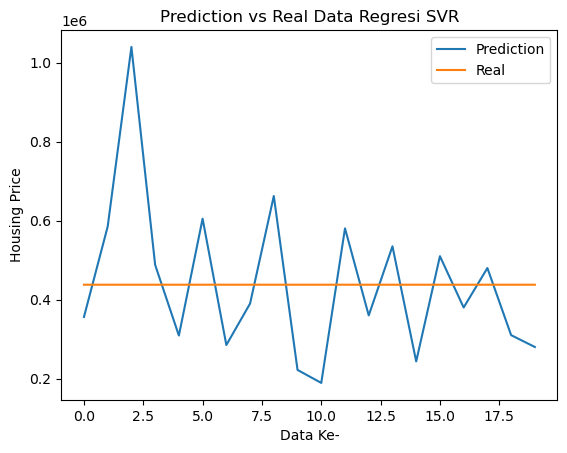

In [82]:
plt.plot(y_test.values)
plt.plot(yPredTest_svr)
plt.title('Prediction vs Real Data Regresi SVR')
plt.xlabel("Data Ke-")
plt.ylabel("Housing Price")
plt.legend(labels=['Prediction','Real'])
plt.show()

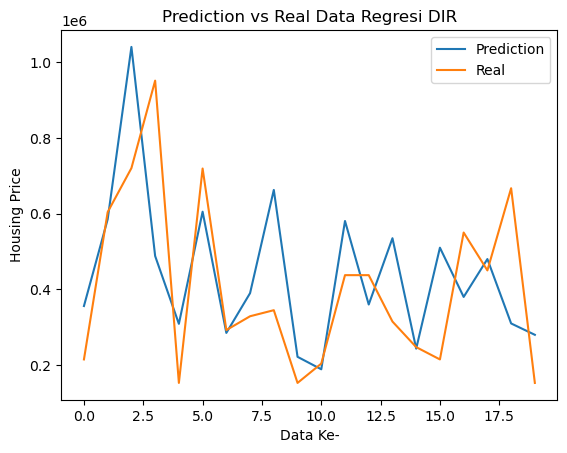

In [83]:
plt.plot(y_test.values)
plt.plot(yPredTest_dtr)
plt.title('Prediction vs Real Data Regresi DIR')
plt.xlabel("Data Ke-")
plt.ylabel("Housing Price")
plt.legend(labels=['Prediction','Real'])
plt.show()

<h2>Kesimpulan</h2>
Model DTR merupakan model terbaik berdasarkan hasil evaluasi menggunakan metrics MSE dan R^2
Model DTR selanjuutnya kita pilih untuk memprediksi data baru
Model DTR juga sudah bisa kita deploy

In [84]:
#input data baru
sqft_living = float(input('Input SQFT living \t='))
sqft_living15 = float(input('Input SQFT living 15 \t='))
sqft_above = float(input('Input SQFT Above \t='))
data_baru = [[sqft_living, sqft_living15, sqft_above]]

#prediksi data baru menggunakan model DTR
hasil_prediksi = dtReg.predict(data_baru)
hasil_prediksi = float(hasil_prediksi)

print('\nPrediksi Housing Price', hasil_prediksi)


Prediksi Housing Price 450000.0
